# Conway's Game of Life - Unlimited Edition
This is a coding problem taken from the website *codewars.com*

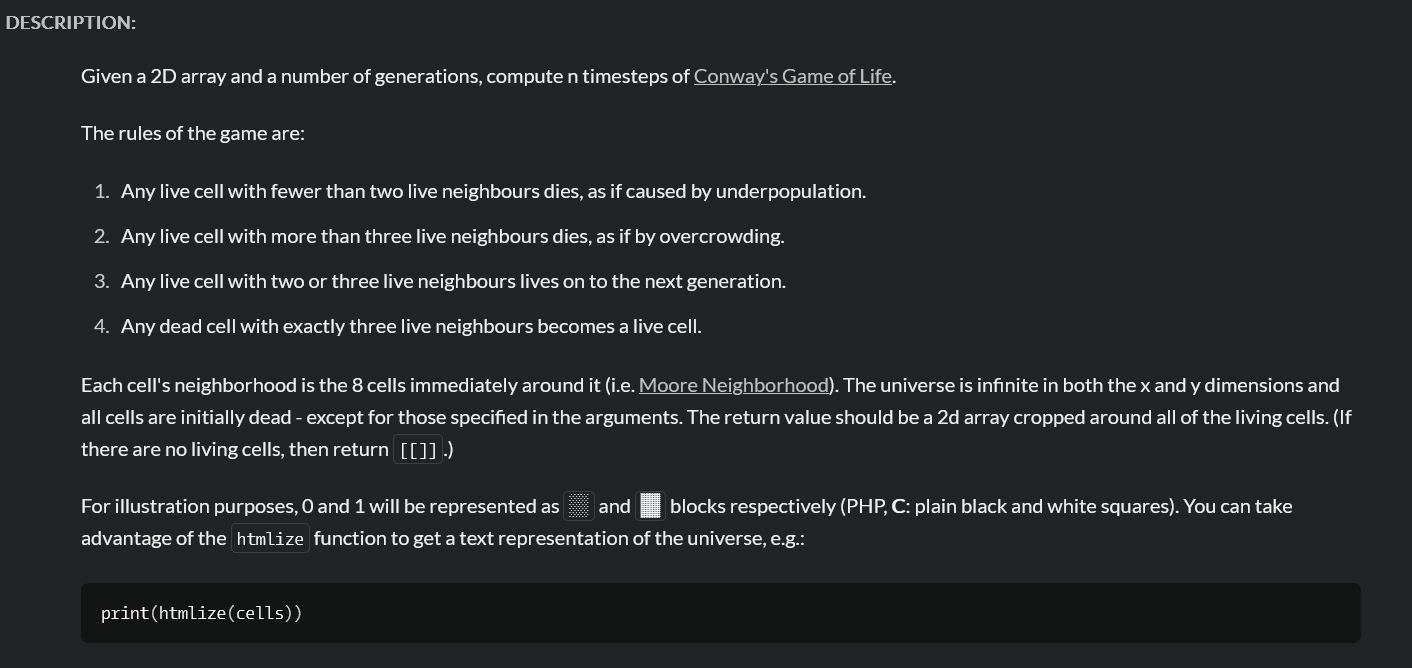

More information on the "Game":
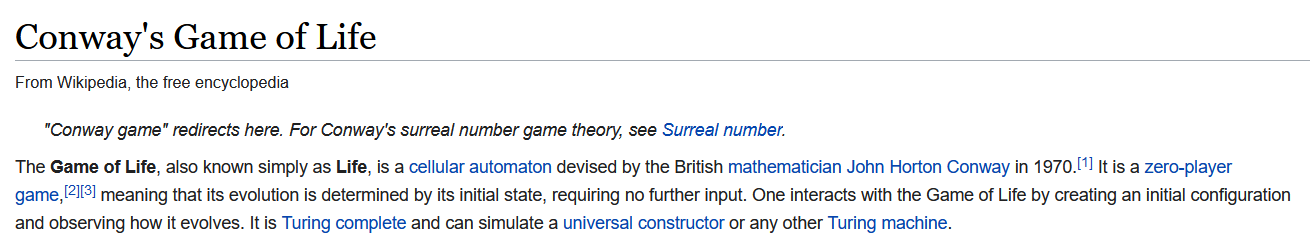

The difference to the original is that in this code challenge, there are no borders. The population can spread and therefore increase or decrease the size of the playing field

**My solution**

In [6]:
# We will need this helper function later
def htmlize(array):
    """
    Optimize array for visibility
    """
    s = []
    for row in array:
        for cell in row:
            s.append('▓▓' if cell else '░░')
        s.append('\n')
    return ''.join(s)

In [17]:
def get_generation(cells, generations,verbose=1):
    import numpy as np
    
    for generation in range(generations):
        
        print("---- GENERATION",generation," ---- \n")

        # CREATE NEW ARRAYS

        padded_cells= np.pad(cells, pad_width=1, mode='constant', constant_values=0) # Creating an array with Zeros at all the edges
        extra_padded_cells=np.pad(padded_cells, pad_width=1, mode='constant', constant_values=0) # For calculation purposes, another padding is necessary

        size=np.shape(padded_cells)
        live_neighbours=np.zeros(size,dtype=int) # This array contains the number of neighbours that are alive for each cell
        new_cells=np.zeros(size,dtype=int) # This will be the output

        # CALCULATE NUMBER OF LIVE NEIGHBOURS

        for x in range(size[0]):
            for y in range(size[1]):
                live_neighbours[x,y]=np.sum(extra_padded_cells[x:x+3,y:y+3])-padded_cells[x,y]

        # CALCULATE NEW POPULATION

        for x in range(size[0]):
            for y in range(size[1]):
                if live_neighbours[x,y]==3: new_cells[x,y]=1
                if live_neighbours[x,y]==2 and padded_cells[x,y]: new_cells[x,y]=1

        # To make the monitor the process, this function contains the following prints.
        
        if verbose>0: 
            print("Input:\n")
            print(htmlize(cells))
        if verbose>1:
            print("Padded:\n")
            print(htmlize(padded_cells.tolist()))
        if verbose>1:
            print("\nAfter Timestep:\n")
            print(htmlize(new_cells.tolist()))
        
        # RESIZE THE ARRAY BY DELETING EMPTY ROWS AND COLOUMNS

        empty_columns=np.sum(new_cells,axis=0)
        empty_rows=np.sum(new_cells,axis=1)
        for x_min in range(len(empty_columns)):
            if empty_columns[x_min]:break
        for y_min in range(len(empty_rows)):
            if empty_rows[y_min]:break
        for x_max in range(len(empty_columns)-1,-1,-1):
            if empty_columns[x_max]:break
        for y_max in range(len(empty_rows)-1,-1,-1):
            if empty_rows[y_max]:break
        
        new_cells=new_cells[y_min:y_max+1,x_min:x_max+1]
        
        if verbose>1:
            print("Resized:\n")
            print(htmlize(new_cells.tolist()))       
        
        cells=new_cells.tolist()
    
    if verbose==1:
        print("Output:")
        print(htmlize(cells))  
    return cells

Let's look at a few examples together. <br />


In [14]:
# Simple example with detailed output:
start = [[1,0,0],
         [0,1,1],
         [1,1,0]]
get_generation(start,5,verbose=2)

---- GENERATION 0  ---- 

Input:

▓▓░░░░
░░▓▓▓▓
▓▓▓▓░░

Padded:

░░░░░░░░░░
░░▓▓░░░░░░
░░░░▓▓▓▓░░
░░▓▓▓▓░░░░
░░░░░░░░░░


After Timestep:

░░░░░░░░░░
░░░░▓▓░░░░
░░░░░░▓▓░░
░░▓▓▓▓▓▓░░
░░░░░░░░░░

Resized:

░░▓▓░░
░░░░▓▓
▓▓▓▓▓▓

---- GENERATION 1  ---- 

Input:

░░▓▓░░
░░░░▓▓
▓▓▓▓▓▓

Padded:

░░░░░░░░░░
░░░░▓▓░░░░
░░░░░░▓▓░░
░░▓▓▓▓▓▓░░
░░░░░░░░░░


After Timestep:

░░░░░░░░░░
░░░░░░░░░░
░░▓▓░░▓▓░░
░░░░▓▓▓▓░░
░░░░▓▓░░░░

Resized:

▓▓░░▓▓
░░▓▓▓▓
░░▓▓░░

---- GENERATION 2  ---- 

Input:

▓▓░░▓▓
░░▓▓▓▓
░░▓▓░░

Padded:

░░░░░░░░░░
░░▓▓░░▓▓░░
░░░░▓▓▓▓░░
░░░░▓▓░░░░
░░░░░░░░░░


After Timestep:

░░░░░░░░░░
░░░░░░▓▓░░
░░▓▓░░▓▓░░
░░░░▓▓▓▓░░
░░░░░░░░░░

Resized:

░░░░▓▓
▓▓░░▓▓
░░▓▓▓▓

---- GENERATION 3  ---- 

Input:

░░░░▓▓
▓▓░░▓▓
░░▓▓▓▓

Padded:

░░░░░░░░░░
░░░░░░▓▓░░
░░▓▓░░▓▓░░
░░░░▓▓▓▓░░
░░░░░░░░░░


After Timestep:

░░░░░░░░░░
░░░░▓▓░░░░
░░░░░░▓▓▓▓
░░░░▓▓▓▓░░
░░░░░░░░░░

Resized:

▓▓░░░░
░░▓▓▓▓
▓▓▓▓░░

---- GENERATION 4  ---- 

Input:

▓▓░░░░
░░▓▓▓▓
▓▓▓▓░░

Padded:

░░░░░░░░░░
░░▓▓░░░░░░
░░░░▓

[[0, 1, 0], [0, 0, 1], [1, 1, 1]]

In [18]:
# Bigger example with less output:
start= [[1, 1, 1, 0, 0, 0, 1, 0], [1, 0, 0, 0, 0, 0, 0, 1], [0, 1, 0, 0, 0, 1, 1, 1]]
get_generation(start,20,verbose=1)

---- GENERATION 0  ---- 

Input:

▓▓▓▓▓▓░░░░░░▓▓░░
▓▓░░░░░░░░░░░░▓▓
░░▓▓░░░░░░▓▓▓▓▓▓

---- GENERATION 1  ---- 

Input:

░░▓▓░░░░░░░░░░░░
▓▓▓▓░░░░░░░░░░░░
▓▓░░▓▓░░░░▓▓░░▓▓
░░░░░░░░░░░░▓▓▓▓
░░░░░░░░░░░░▓▓░░

---- GENERATION 2  ---- 

Input:

▓▓▓▓░░░░░░░░░░░░
▓▓░░▓▓░░░░░░░░░░
▓▓░░░░░░░░░░░░▓▓
░░░░░░░░░░▓▓░░▓▓
░░░░░░░░░░░░▓▓▓▓

---- GENERATION 3  ---- 

Input:

░░▓▓▓▓░░░░░░░░░░░░░░
▓▓▓▓░░░░░░░░░░░░░░░░
░░░░▓▓░░░░░░░░▓▓░░░░
░░░░░░░░░░░░░░░░▓▓▓▓
░░░░░░░░░░░░░░▓▓▓▓░░

---- GENERATION 4  ---- 

Input:

▓▓▓▓▓▓░░░░░░░░░░░░░░
▓▓░░░░░░░░░░░░░░░░░░
░░▓▓░░░░░░░░░░░░▓▓░░
░░░░░░░░░░░░░░░░░░▓▓
░░░░░░░░░░░░░░▓▓▓▓▓▓

---- GENERATION 5  ---- 

Input:

░░▓▓░░░░░░░░░░░░░░░░
▓▓▓▓░░░░░░░░░░░░░░░░
▓▓░░▓▓░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░▓▓░░▓▓
░░░░░░░░░░░░░░░░▓▓▓▓
░░░░░░░░░░░░░░░░▓▓░░

---- GENERATION 6  ---- 

Input:

▓▓▓▓░░░░░░░░░░░░░░░░
▓▓░░▓▓░░░░░░░░░░░░░░
▓▓░░░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░░░░░
░░░░░░░░░░░░░░░░░░▓▓
░░░░░░░░░░░░░░▓▓░░▓▓
░░░░░░░░░░░░░░░░▓▓▓▓

---- GENERATION 7  ---- 

Inpu

[[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]]